In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re,os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,LSTM,Embedding
from nltk.corpus import stopwords
from nltk.stem  import WordNetLemmatizer
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from os import path, getcwd
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata


In [2]:
data=pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_train.csv")


In [3]:
train_data=pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_train.csv")
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
test_data=pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_test.csv")
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
train_data.shape

(41157, 6)

In [6]:
test_data.shape

(3798, 6)

In [7]:
train_data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
test_data.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [9]:
train_data=train_data[["OriginalTweet","Sentiment"]]
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
test_data=test_data[["OriginalTweet","Sentiment"]]
test_data.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [11]:
train_data["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [12]:
test_data["Sentiment"].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [13]:
train_data["Sentiment"]=train_data["Sentiment"].replace({"Extremely Negative":"Negative","Extremely Positive":"Positive"})
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


In [14]:
test_data["Sentiment"]=test_data["Sentiment"].replace({"Extremely Negative":"Negative","Extremely Positive":"Positive"})
test_data.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Data Visualization:

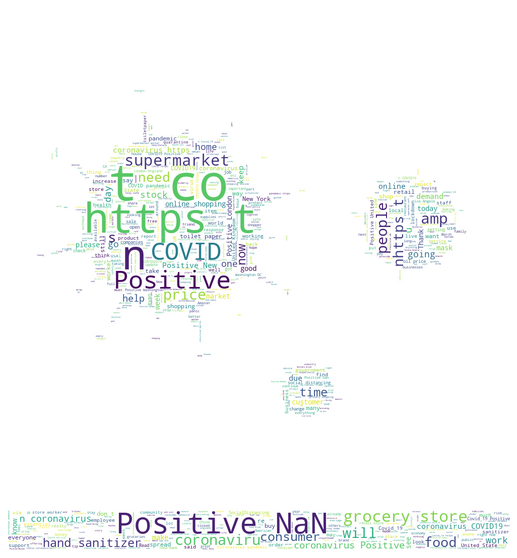

In [15]:
positive=data[data["Sentiment"]=="Positive"].to_string()
image=np.array(Image.open("../input/pictures/corona-virus-abstract-microbe-on-white-background-vector-30072245.jpg"))
word=WordCloud(mask=image,background_color="white",max_font_size=100,max_words=10000,random_state=42)
word.generate(positive)
plt.figure(figsize=[10,10])
plt.imshow(word,interpolation="blackman")
plt.axis(False)
plt.show()

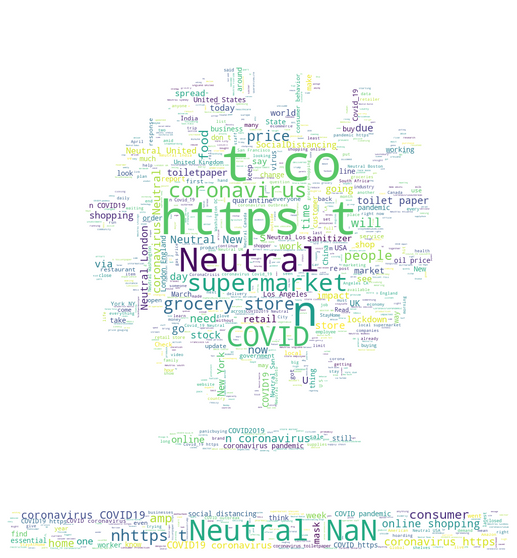

In [16]:
Neutral=data[data["Sentiment"]=="Neutral"].to_string()
image=np.array(Image.open("../input/pictures/covid19-19-corona-blue-virus-on-a-white-background-vector-30411167.jpg"))
word=WordCloud(mask=image,background_color="white",max_font_size=100,max_words=10000,random_state=42)
word.generate(Neutral)
plt.figure(figsize=[10,10])
plt.imshow(word,interpolation="blackman")
plt.axis(False)
plt.show()

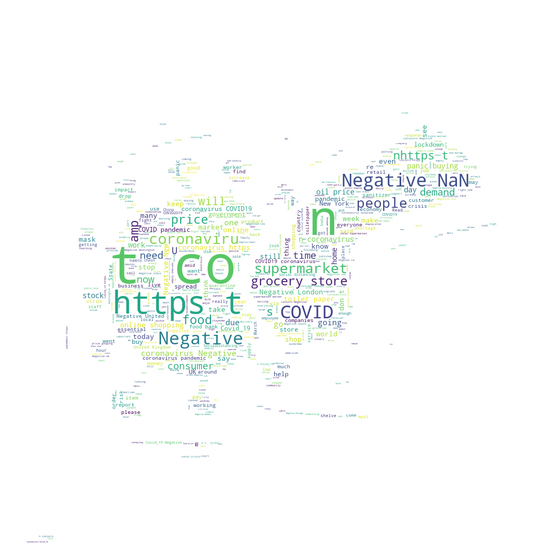

In [17]:
Negative=data[data["Sentiment"]=="Negative"].to_string()
image=np.array(Image.open("../input/pictures2/istockphoto-1215484860-1024x1024.jpg"))
word=WordCloud(mask=image,background_color="white",max_font_size=100,max_words=20000,random_state=42)
word.generate(Negative)
plt.figure(figsize=[10,10])
plt.imshow(word,interpolation="blackman")
plt.axis(False)
plt.show()

# Cleaning Process:

In [18]:
sw=stopwords.words("english")


In [19]:
def clean(raw_text):
    raw_text=re.sub(r"#\w+"," ",raw_text)
    raw_text=re.sub(r"@\w+"," ",raw_text)
    raw_text=re.sub(r"http\S+"," ",raw_text)
    raw_text=re.sub(r"\d+"," ",raw_text)
    raw_text=re.sub("r<.*?>"," ",raw_text)
    raw_text=raw_text.split()
    raw_text=" ".join([word for word in raw_text if not word in sw])
    return raw_text  

In [20]:
train_data.head(2)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive


In [21]:
train_data["OriginalTweet"]=train_data["OriginalTweet"].apply(lambda x:clean(x))
train_data.head()

,OriginalTweet,Sentiment
0,,Neutral
1,advice Talk neighbours family exchange phone n...,Positive
2,Coronavirus Australia: Woolworths give elderly...,Positive
3,"My food stock one empty... PLEASE, panic, THER...",Positive
4,"Me, ready go supermarket outbreak. Not I'm par...",Negative


In [22]:
test_data["OriginalTweet"]=test_data["OriginalTweet"].apply(lambda x:clean(x))
test_data.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,"When I find hand sanitizer Fred Meyer, I turne...",Positive
2,Find protect loved ones . ?,Positive
3,buying hits City anxious shoppers stock food&a...,Negative
4,One week everyone buying baby milk powder next...,Neutral


# Upper to Lower case:

In [23]:
train_data["OriginalTweet"]=[word.lower() for word in train_data["OriginalTweet"]]
test_data["OriginalTweet"]=[word.lower() for word in test_data["OriginalTweet"]]


In [24]:
import string
string.punctuation
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
train_data["OriginalTweet"]=[re_punc.sub(" ",w) for w in train_data["OriginalTweet"]]
test_data["OriginalTweet"]=[re_punc.sub(" ",w) for w in test_data["OriginalTweet"]]

In [25]:
train_data.head()

,OriginalTweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly...,Positive
3,my food stock one empty please panic ther...,Positive
4,me ready go supermarket outbreak not i m par...,Negative


In [26]:
train_data["Sentiment"]=train_data["Sentiment"].map({"Positive":1,"Neutral":2,"Negative":3})

In [27]:
test_data["Sentiment"]=test_data["Sentiment"].map({"Positive":1,"Neutral":2,"Negative":3})

In [28]:
x_train=train_data["OriginalTweet"]
x_test=test_data["OriginalTweet"]
y_train=train_data["Sentiment"]
y_test=test_data["Sentiment"]
x_train

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia  woolworths give elderly...
3        my food stock one empty    please  panic  ther...
4        me  ready go supermarket outbreak  not i m par...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid  rela...
41154    you know its getting tough rationing toilet p...
41155      is wrong smell hand sanitizer starting turn on 
41156    well new used rift s going     amazon rn altho...
Name: OriginalTweet, Length: 41157, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [30]:
cv=CountVectorizer()
print(cv)


CountVectorizer()


In [31]:
train_set=cv.fit_transform(x_train)
train_set.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
test_set=cv.transform(x_test)
test_set.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
machine=GradientBoostingClassifier(n_estimators=1000)
machine.fit(train_set,y_train)

GradientBoostingClassifier(n_estimators=1000)

In [34]:

Prediction=machine.predict(test_set)
Prediction

array([3, 1, 1, ..., 2, 3, 1])

In [35]:
y_test

0       3
1       1
2       1
3       3
4       2
       ..
3793    1
3794    3
3795    2
3796    3
3797    1
Name: Sentiment, Length: 3798, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Prediction,y_test)*100

81.7798841495524

In [37]:
machine.score(train_set,y_train)*100

87.39947032096606

In [43]:
test=["When I couldn't find hand sanitizer at Fred Me"]
test=cv.transform(test)
test=test.toarray()
prediction=machine.predict(test)
if prediction==1:
    print("Positive")
elif prediction==2:
    print("Neutral")
else:
    print("Negative")

Positive
